# Initialization

In [207]:
import numpy as np

SEED = 42
NUM_ELEMENTS = 100000  # 100k elements in the stream
NUM_UNIQUE = 10000  # 10k unique elements
NUM_RUNS = 25

# Set the seed for reproducibility
np.random.seed(SEED)

# Generate a stream of elements
stream = np.random.randint(0, NUM_UNIQUE, NUM_ELEMENTS)

# Shuffle the stream
np.random.shuffle(stream)

print(f"Stream length: {len(stream)}")
print(f"Number of unique elements: {len(np.unique(stream))}")
print(f"First 10 elements of the stream: {stream[:10]}")

# Generate sketches
sketch_sizes = np.logspace(1, 5, num=30, base=10, dtype=int)
print(f"Sketch sizes: {sketch_sizes}")


Stream length: 100000
Number of unique elements: 10000
First 10 elements of the stream: [7373 4170 6775 6174 3168 6847 9084 1929 1287 1598]
Sketch sizes: [    10     13     18     25     35     48     67     92    126    174
    239    329    452    621    853   1172   1610   2212   3039   4175
   5736   7880  10826  14873  20433  28072  38566  52983  72789 100000]


In [208]:
import hashlib

def hash_fn(element, seed=SEED):
    """
    Hash function that maps an element to a random number between 0 and 1.
    """
    hash_obj = hashlib.sha256(f"{seed}-{element}".encode())
    hash_int = int(hash_obj.hexdigest(), 16)
    return hash_int / 2**256

## Flajolet Martin

### Flajolet Martin - Alpha Version

In [209]:
def flajolet_martin(stream: np.ndarray) -> float:
    """
    Flajolet-Martin algorithm for counting distinct elements in a stream.
    :param stream: numpy array of elements
    :return: estimated number of distinct elements
    """
    X = 1  # Initialize the maximum possible hash value
    for element in stream:
        X = min(X, hash_fn(element))
    return 1 / X

Run the Alpha version 25 times for each sketch size

In [ ]:
results = {size: [] for size in sketch_sizes}

for sketch_size in sketch_sizes:
    for _ in range(NUM_RUNS):
        # Generate a sketch
        indices = np.random.choice(len(stream), size=sketch_size, replace=False)
        sketch = stream[indices]
        
        # Run Flajolet-Martin algorithm on the sketch
        estimate = flajolet_martin(sketch)
        results[sketch_size].append(estimate)
        
    print(f"Finished sketch size {sketch_size}")

Finished sketch size 10
Finished sketch size 13
Finished sketch size 18
Finished sketch size 25
Finished sketch size 35
Finished sketch size 48
Finished sketch size 67
Finished sketch size 92
Finished sketch size 126
Finished sketch size 174
Finished sketch size 239
Finished sketch size 329
Finished sketch size 452
Finished sketch size 621
Finished sketch size 853
Finished sketch size 1172
Finished sketch size 1610
Finished sketch size 2212
Finished sketch size 3039
Finished sketch size 4175
Finished sketch size 5736
Finished sketch size 7880
Finished sketch size 10826
Finished sketch size 14873
Finished sketch size 20433
Finished sketch size 28072
Finished sketch size 38566
Finished sketch size 52983


For each sketch size, calculate accuracy, bias, normalized-variance 

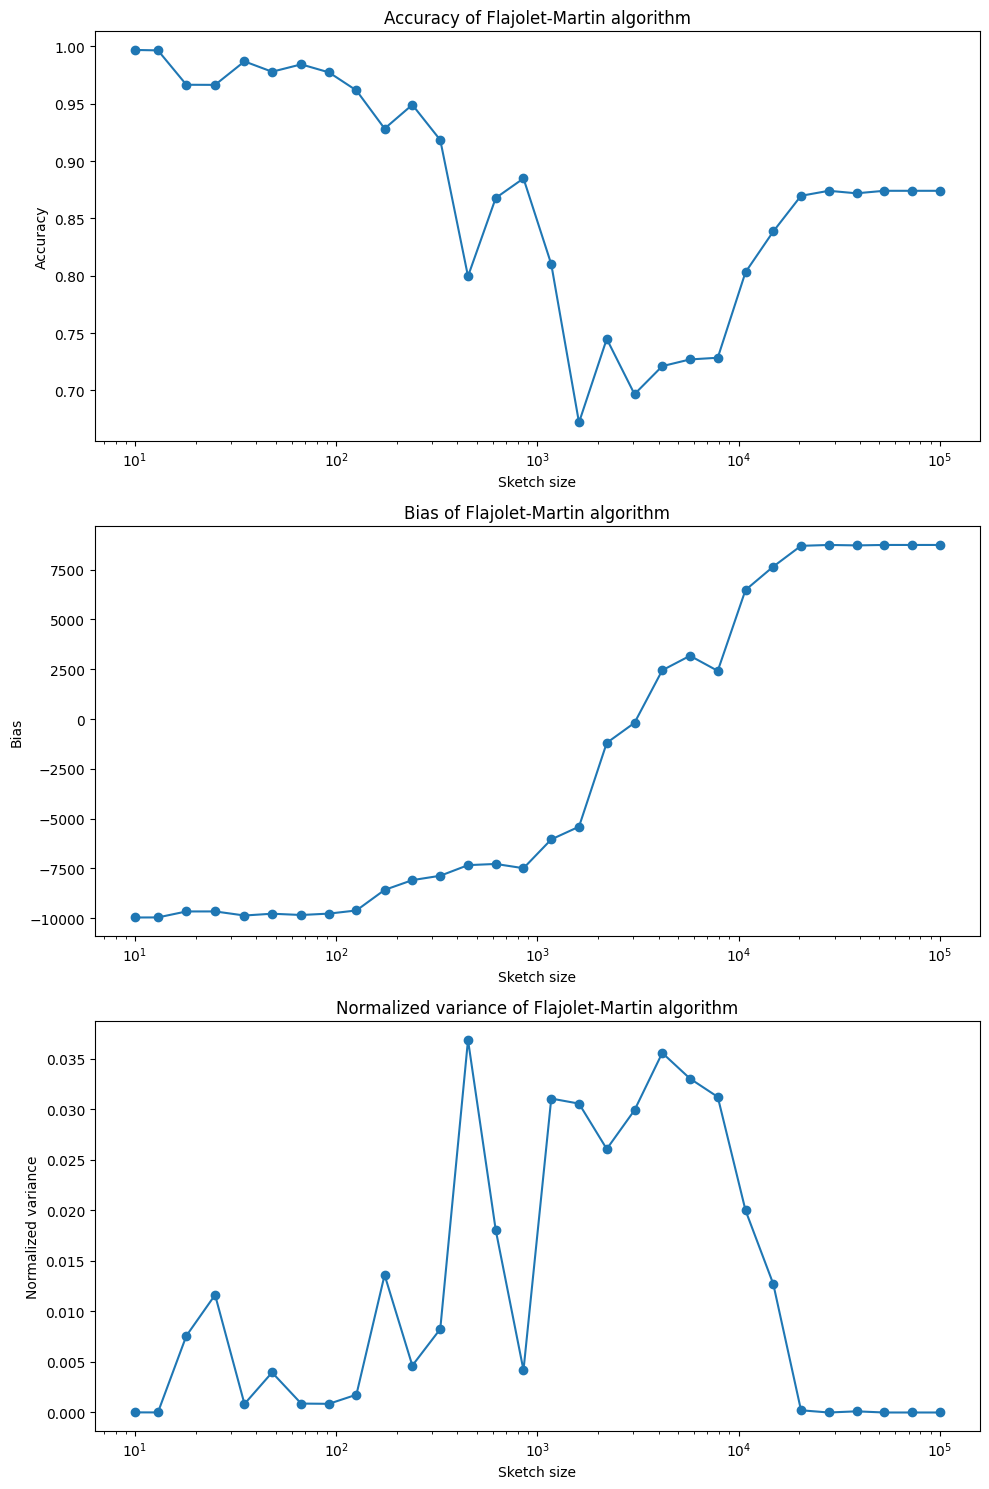

In [ ]:
import matplotlib.pyplot as plt

true_unique = len(np.unique(stream))

accuracies = np.array([np.mean([abs(est - true_unique) / true_unique for est in results[size]])
                          for size in sketch_sizes])

variances = np.array([np.var([abs(est - true_unique) / true_unique for est in results[size]])
                            for size in sketch_sizes])

biases = np.array([np.mean([est - true_unique for est in results[size]])
                            for size in sketch_sizes])

# Create a figure and axis
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot the accuracy
axs[0].plot(sketch_sizes, accuracies, marker='o')
axs[0].set_xscale('log')
axs[0].set_xlabel("Sketch size")
axs[0].set_ylabel("Accuracy")
axs[0].set_title("Accuracy of Flajolet-Martin algorithm")

# Plot the bias
axs[1].plot(sketch_sizes, biases, marker='o')
axs[1].set_xscale('log')
axs[1].set_xlabel("Sketch size")
axs[1].set_ylabel("Bias")
axs[1].set_title("Bias of Flajolet-Martin algorithm")

# Plot the normalized variance
axs[2].plot(sketch_sizes, variances, marker='o')
axs[2].set_xscale('log')
axs[2].set_xlabel("Sketch size")
axs[2].set_ylabel("Normalized variance")
axs[2].set_title("Normalized variance of Flajolet-Martin algorithm")

plt.tight_layout()
plt.show()